<a href="https://colab.research.google.com/github/shabbar88/MY_MACHINE_LEARNING/blob/main/Simple_linear_regression_using_stats_model(self).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
"""
# uploading dataset through local machine
from google.colab import files
uploaded = files.upload()
"""

'\n# uploading dataset through local machine\nfrom google.colab import files\nuploaded = files.upload()\n'

In [35]:
# import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# reading csv through githib
data=pd.read_csv("https://github.com/shabbar88/LATEST-DATA--SCIENCE/raw/main/Salary_Data.csv")

In [37]:
data=pd.read_csv("Salary_Data.csv")

In [38]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [39]:
data.shape

(30, 2)

In [40]:
data.size

60

In [41]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [43]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [44]:
# checking for null values
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [45]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# YearsExperience and Salary is highly correlated

In [46]:
import warnings
warnings.filterwarnings('ignore')

# VISUALISATIION

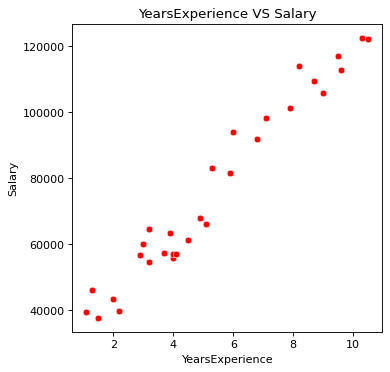

In [47]:
plt.figure(figsize = (5,5),dpi=80);
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'],data=data,palette='set1',color='red');
plt.title('YearsExperience VS Salary');

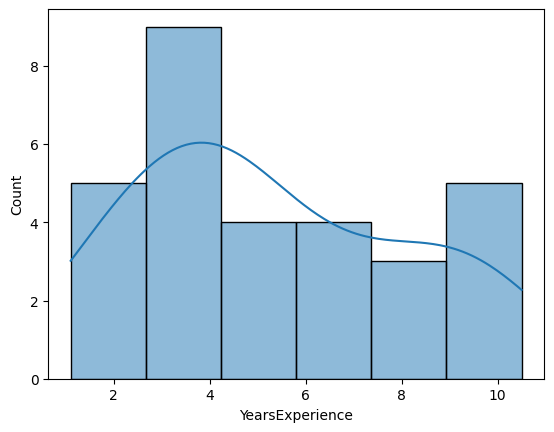

In [48]:
sns.histplot(data['YearsExperience'],kde=True);

In [49]:
data['Salary'].value_counts()

39343     1
46205     1
122391    1
112635    1
116969    1
105582    1
109431    1
113812    1
101302    1
98273     1
91738     1
93940     1
81363     1
83088     1
66029     1
67938     1
61111     1
57081     1
56957     1
55794     1
63218     1
57189     1
64445     1
54445     1
60150     1
56642     1
39891     1
43525     1
37731     1
121872    1
Name: Salary, dtype: int64

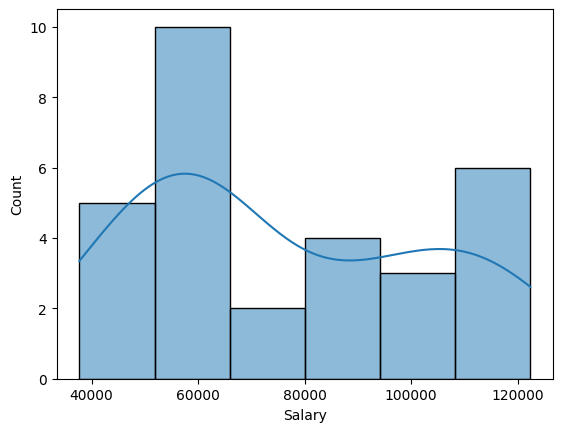

In [50]:
sns.histplot(data['Salary'],kde=True);

# FITTING LINEAR REGRESSION MODEL

In [51]:

import statsmodels.formula.api as smf

In [52]:
#OLS=Ordinary Least Squares
model = smf.ols("Salary~YearsExperience",data = data).fit()

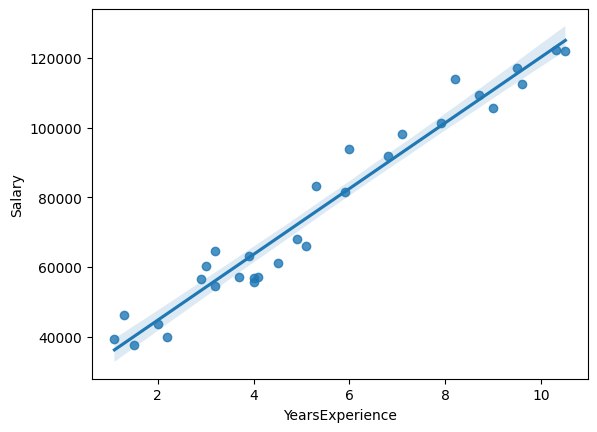

In [53]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [54]:
#Coefficients
#Interpretation for Beta Coefficient of WT
"""
For every unit increase in the YearsExperience  value, the value for Salary will
increase by 9949.96
"""
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

#Coefficients
#Interpretation for Beta Coefficient of YearsExperience

For every unit increase in the YearsExperience  value, the value for Salary will
increase by 9949.96


In [55]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

# Y=B0 + B1*X1 + e

#B0 - Intercept
#B1 - Slope
# X1 - Independent data point
e (error) - Vertical distance between the actual 'Salary' value & the Salary fitted value

# testing on several data points, so we re taking series here

In [56]:
new_data=pd.Series([9.6,9.7,3.4,3.9])

In [57]:
# converting seriesn data to DataFrame
sal_test=pd.DataFrame(new_data,columns=['YearsExperience'])

In [58]:
# predicting
model.predict(sal_test)

0    116511.838485
1    117456.834717
2     57922.072092
3     62647.053252
dtype: float64

In [59]:
# to see model prediction
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [60]:
data['Predicted']=model.fittedvalues
data[0:5]

,YearsExperience,Salary,Predicted
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306


In [61]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [62]:
#For Manual Calculations
data['Predicted1']=25792.200199 + (9449.962321 * data['YearsExperience'])
data[0:5]

,YearsExperience,Salary,Predicted,Predicted1
0,1.1,39343,36187.158752,36187.158752
1,1.3,46205,38077.151217,38077.151216
2,1.5,37731,39967.143681,39967.143680
3,2.0,43525,44692.124842,44692.124841
4,2.2,39891,46582.117306,46582.117305


In [63]:
model.resid
# it gives error for each value

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [64]:
#To generate the residual values
#Difference between Actual & Fitted Values
data['Error']=model.resid
data[0:5]

,YearsExperience,Salary,Predicted,Predicted1,Error
0,1.1,39343,36187.158752,36187.158752,3155.841248
1,1.3,46205,38077.151217,38077.151216,8127.848783
2,1.5,37731,39967.143681,39967.143680,-2236.143681
3,2.0,43525,44692.124842,44692.124841,-1167.124842
4,2.2,39891,46582.117306,46582.117305,-6691.117306


In [66]:
# error = Actual - Predicted
# manually calculating error
data['Error1']=data['Salary'] - data['Predicted']
data[0:5]

,YearsExperience,Salary,Predicted,Predicted1,Error,Error1
0,1.1,39343,36187.158752,36187.158752,3155.841248,3155.841248
1,1.3,46205,38077.151217,38077.151216,8127.848783,8127.848783
2,1.5,37731,39967.143681,39967.143680,-2236.143681,-2236.143681
3,2.0,43525,44692.124842,44692.124841,-1167.124842,-1167.124842
4,2.2,39891,46582.117306,46582.117305,-6691.117306,-6691.117306


In [67]:
data['Error_Sq']=(data['Error'])**2
data[0:5]

,YearsExperience,Salary,Predicted,Predicted1,Error,Error1,Error_Sq
0,1.1,39343,36187.158752,36187.158752,3155.841248,3155.841248,9.959334e+06
1,1.3,46205,38077.151217,38077.151216,8127.848783,8127.848783,6.606193e+07
2,1.5,37731,39967.143681,39967.143680,-2236.143681,-2236.143681,5.000339e+06
3,2.0,43525,44692.124842,44692.124841,-1167.124842,-1167.124842,1.362180e+06
4,2.2,39891,46582.117306,46582.117305,-6691.117306,-6691.117306,4.477105e+07


In [68]:
#Y = B0 + B1*X + e
# Intercept(B0)          25792.200199
# YearsExperience(B1)     9449.962321

data['Predicted1']= 25792.200199+ (9449.962321 * data['YearsExperience'])
data['Y']= 25792.200199+ (9449.962321 * data['YearsExperience']) + data['Error']
data[0:5]

,YearsExperience,Salary,Predicted,Predicted1,Error,Error1,Error_Sq,Y
0,1.1,39343,36187.158752,36187.158752,3155.841248,3155.841248,9.959334e+06,39343.000000
1,1.3,46205,38077.151217,38077.151216,8127.848783,8127.848783,6.606193e+07,46205.000000
2,1.5,37731,39967.143681,39967.143680,-2236.143681,-2236.143681,5.000339e+06,37731.000000
3,2.0,43525,44692.124842,44692.124841,-1167.124842,-1167.124842,1.362180e+06,43524.999999
4,2.2,39891,46582.117306,46582.117305,-6691.117306,-6691.117306,4.477105e+07,39890.999999


In [69]:
Mean_Squared_Error=data['Error_Sq'].mean()
Mean_Squared_Error

31270951.72228097

In [70]:
model.rsquared

0.9569566641435086

#95.69 % of variation in the dependent variable is explained by the given independent variable

In [71]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

#Null Hypothesis - YearsExperience  doesn't affect the salary significantly.
#Alternate Hypothesis -YearsExperience  significantly affects the Salary.

#Since p-value is less then 0.05 for 'YearsExperience' variable,
#We can say that it is a significant variable in predicting the dependent variable 'Salary'

In [ ]:
#Null Hypothesis - YearsExperience  doesn't affect the salary significantly.
#Alternate Hypothesis -YearsExperience  significantly affects the Salary.

#Since p-value is less then 0.05 for 'YearsExperience' variable,
#We can say that it is a significant variable in predicting the dependent variable 'Salary'
